In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
da=np.load('/global/u1/a/anze/ToySampleDefinition/sampledeftoy.npz')['arr_0']


In [3]:
da.dtype

dtype([('mag_u_cModel', '<f8'), ('mag_g_cModel', '<f8'), ('mag_r_cModel', '<f8'), ('mag_i_cModel', '<f8'), ('mag_z_cModel', '<f8'), ('mag_y_cModel', '<f8'), ('magerr_u', '<f8'), ('magerr_g', '<f8'), ('magerr_r', '<f8'), ('magerr_i', '<f8'), ('magerr_z', '<f8'), ('magerr_y', '<f8'), ('photoz_mode', '<f8'), ('redshift', '<f8'), ('photoz_pdf', '<f8', (101,))])

In [4]:
## Number of objects:
print (len(da))

364837


In [5]:
pzs=da['photoz_mode'] # photoz
trz=da['redshift'] #true z

Text(0, 0.5, 'true z')

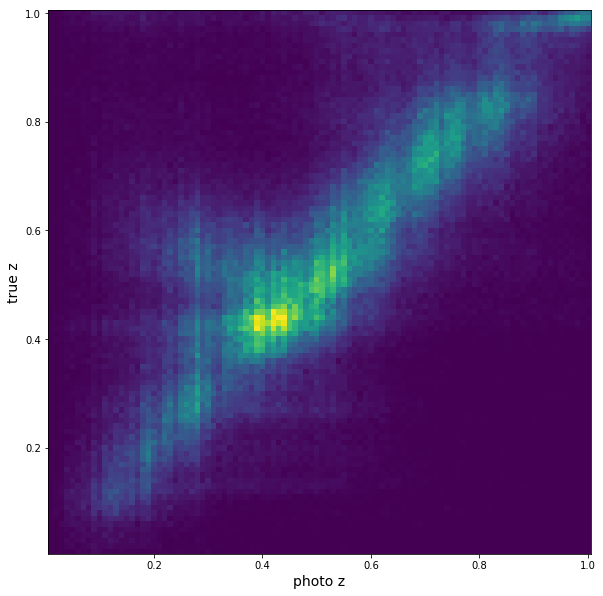

In [6]:
plt.figure(figsize=(10,10))
H,xedges,yedges=np.histogram2d(pzs,trz,bins=100)
plt.imshow(H, interpolation='nearest', origin='low', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.xlabel('photo z',fontsize=14)
plt.ylabel('true z',fontsize=14)

(0, 0.1386)

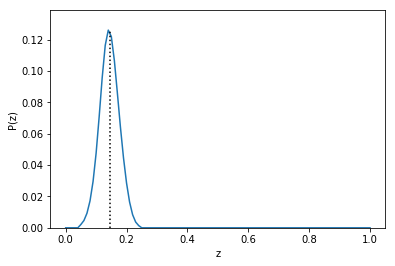

In [7]:
## Plot photoz of one particular object
idx=121
x=np.linspace(0,1,101)
pdf=da['photoz_pdf'][idx,:]
mode=da['photoz_mode'][idx]
plt.plot(x,pdf)
plt.plot([mode,mode],[0,pdf.max()],'k:')
plt.xlabel('z')
plt.ylabel('P(z)')
plt.ylim(0,pdf.max()*1.1)

/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/ipykernel/__main__.py:12: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
/global/common/software/lsst/common/miniconda/py3-4.5.12/envs/stack/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Text(0, 0.5, 'N(z)')

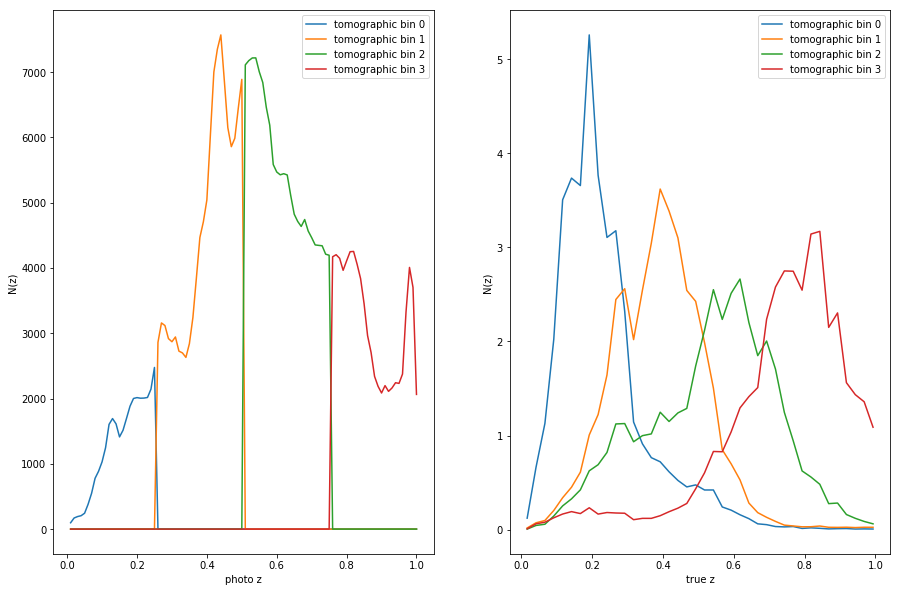

In [8]:
## Let's make 4 bins based on photoz mode
Nb=4
zs=np.linspace(pzs.min(),pzs.max(), Nb+1)
plt.figure(figsize=(15,10))
for i in range(Nb):
    w=np.where((pzs>=zs[i]) & (pzs<zs[i+1]))
    plt.subplot(1,2,1)
    h,x=np.histogram(pzs[w],bins=100,range=(pzs.min(),pzs.max()))    
    mx=0.5*(x[1:]+x[:-1])
    plt.plot(mx,h,label='tomographic bin %i'%i)
    plt.subplot(1,2,2)
    h,x=np.histogram(trz[w],bins=40,range=(trz.min(),trz.max()),normed=True)    
    mx=0.5*(x[1:]+x[:-1])
    plt.plot(mx,h,label='tomographic bin %i'%i)

plt.subplot(1,2,1)
plt.legend()
plt.xlabel('photo z')
plt.ylabel('N(z)')

plt.subplot(1,2,2)
plt.legend()
plt.xlabel('true z')
plt.ylabel('N(z)')